## Sampling Error

Sampling error is the difference in statistics (sample information) and the actually population parameters.

`sampling error = parameter - statistic`

### Task One

Given the data wnba.csv in the folder data.

The dataset is about basketball players in the WNBA (Women's National Basketball Association), and contains general information about players, along with their metrics for the 2016-2017 season.

Explore the dataset.

+ Print the first five rows using DataFrame.head() and the last five rows with DataFrame.tail().
+ Find the number of rows and columns using DataFrame.shape.
+ Learn about each column from the documentation. You can also find useful documentation in this glossary and on WNBA's official page.

Take one measure of the sampling error.

+ Use the Games Played column to find the maximum number of games played by a player in the 2016-2017 season. The dataset contains all the players who played at least one game, so it's a population relative to our question. Find this parameter, and assign the result to a variable named parameter.
+ Using the `DataFrame.sample()` method, randomly sample 30 players from the population, and assign the result to a variable named sample.
+ When calling `Series.sample()`, use the argument random_state = 1. This makes your results reproducible, and it helps us with the answer-checking (we'll discuss this on the next screen).
+ Find the maximum number of games using the sample, and assign the result to a variable named statistic.
+ Measure the sampling error, and assign the result to a variable named sampling_error.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

path = "data/wnba.csv"

wnba = pd.read_csv(path)

In [3]:
wnba.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,3,9,12,12,7,0,14,50,0,0


In [3]:
wnba.tail()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
138,Tiffany Hayes,ATL,G,178,70.0,22.093170,US,"September 20, 1989",27,Connecticut,...,28,89,117,69,37,8,50,467,0,0
139,Tiffany Jackson,LA,F,191,84.0,23.025685,US,"April 26, 1985",32,Texas,...,5,18,23,3,1,3,8,28,0,0
140,Tiffany Mitchell,IND,G,175,69.0,22.530612,US,"September 23, 1984",32,South Carolina,...,16,70,86,39,31,5,40,277,0,0
141,Tina Charles,NY,F/C,193,84.0,22.550941,US,"May 12, 1988",29,Connecticut,...,56,212,268,75,21,22,71,582,11,0
142,Yvonne Turner,PHO,G,175,59.0,19.265306,US,"October 13, 1987",29,Nebraska,...,11,13,24,30,18,1,32,151,0,0


In [4]:
wnba.shape

(143, 32)

the dataset has 143 rows and 32 columns

Maximum number of games played in the whole dataset

In [6]:
parameter = wnba['Games Played'].max()
print(parameter)

32


Generating a random sample of games player for 30 players

In [7]:
sample = wnba['Games Played'].sample(30, random_state=1)

Sample maximum number of games played

In [9]:
statistic = sample.max()
print(statistic)


30


The sampling error is the difference between the two

In [10]:
sampling_error = parameter - statistic

sampling_error

2

## Random Sampling

In sampling we want to minimize the sampling error as much as possible by determining a representative sample.
Sampling error decreases as the sample representativity increases.

![Sampling error decreases with representativity](img/s1m1_representativity.svg)


### Visualization of Simple Random Sampling Using Python


Using simple random sampling, take 100 samples of 10 values each from our WNBA data set, and for each sample, measure the average points scored by a player during the 2016-2017 season. For each of the 100 iterations of a for loop, do the following:

+ Sample 10 values from the PTS column.
+ Compute the mean of this sample made of 10 values from the PTS column, and append the result to a list.
+ To make your results reproducible, vary the random_state parameter of the sample() method with values between 0 and 99. For the first iteration of the for loop, random_state should equal 0, for the second iteration should equal 1, for the third should equal 2, and so on.



In [11]:
sample_means = []

In [15]:
population_mean = wnba['PTS'].mean()
print(population_mean)

201.7902097902098


In [13]:
for i in range(100):
    sample = wnba['PTS'].sample(10, random_state=i)
    sample_means.append(sample.mean())


In [14]:
sample_means = pd.Series(sample_means)
sample_means.mean()

187.805



Display the discrepancy between the parameter of interest (the mean of the PTS column) and the statistics obtained in the previous step.

+ Using `plt.scatter()`, display all the 100 sample means using a scatter plot. For the x-axis, use integers from 1 to 100 to designate the sample number. Use the y-axis for the sample means.
+ Using `plt.axhline()`, draw a horizontal line that represents the average number of points for the population.



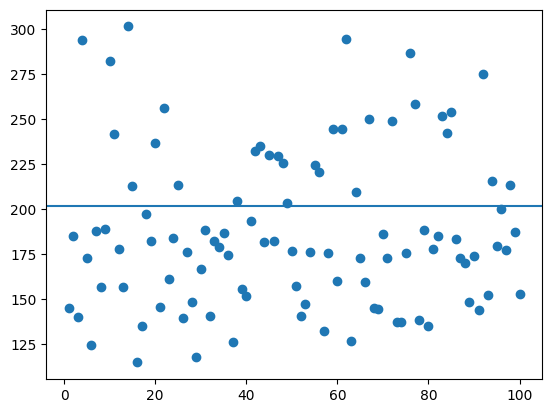

In [16]:
plt.scatter(range(1,101), sample_means)
plt.axhline(population_mean)
plt.show()

### The importance of Sample Size

We can see that the sample means vary a lot around the population mean. With a minimum sample mean of 115 points, a maximum of 301.4, and a population mean of roughly 201.8, we can tell that the sampling error is quite large for some of the cases. 

Because sample means vary a lot around the population mean, there's a good chance we get a sample that isn't representative of the population:

We can solve this problem by increasing the sample size. As we increase the sample size, the sample means vary less around the population mean, and the chances of getting an unrepresentative sample decrease.

![Increasing Sample Size](img/stats_sample_size.png)

Simple random sampling isn't a reliable sampling method when the sample size is small. Because sample means vary a lot around the population mean, there's a good chance we'll get an unrepresentative sample.

When we do simple random sampling, we should try to get a sample that is as large as possible. A large sample decreases the variability of the sampling process, which, in turn, decreases the chances that we'll get an unrepresentative sample.

![Large Sample](img/s1m1_representative_high.svg)

## Statified Sampling

Because simple random sampling is entirely random, it can exclude certain population individuals who are relevant to some of our questions.

For example, players in basketball play in different positions on the court. The metrics of a player (number of points, number of assists, etc.) depend on their position, and we might want to analyze the patterns for each individual position. If we perform simple random sampling, there's a chance that our sample won't include some categories.

 In other words, it's not guaranteed that we'll have a representative sample that has observations for every position we want to analyze.

There are five uniques positions in our dataset

In [14]:
wnba['Pos'].unique()

array(['F', 'G/F', 'G', 'C', 'F/C'], dtype=object)

F is Foward

G is Guard

C is Center

Over representation in SRS

![Overepresentation](img/s1m1_srs_down.svg)

To ensure we end up with a sample that has observations for all the categories of interest, we can change the sampling method. We can organize our data set into different groups and then do simple random sampling for every group. We can group our data set by player position, and then sample randomly from each group as shown below:

![stratified](img/s1m1_stratified_sampling_v3.svg)

#### Task

Perform stratified sampling: stratify the dataset by player position, and then do simple random sampling on every stratum. At the end, use the sample to determine which position scores the highest number of points per game.

1. Create a new column that describes the number of points a player scored per game during the season. The number of total points a player scored during the entire season is in the PTS column, and the number of games played is in the Games Played column. Give the new column a relevant name.

In [15]:
wnba['Pts_per_game']=wnba['PTS']/wnba['Games Played']

2. Stratify the wnba data set by player position. The Pos column describes a player's position. Assign each stratum to a different variable.

In [16]:
# Stratifying the data in five strata
stratum_G = wnba[wnba.Pos == 'G']
stratum_F = wnba[wnba.Pos == 'F']
stratum_C = wnba[wnba.Pos == 'C']
stratum_GF = wnba[wnba.Pos == 'G/F']
stratum_FC = wnba[wnba.Pos == 'F/C']

3. Loop through the strata, and for each stratum, do the following:

    + Sample 10 observations using simple random sampling (set random_state = 0).
    + Find the mean points per game using the sample. Use the new column you created earlier.
    + Find a way to store the mean along with its corresponding position. You can use a dictionary.


In [17]:
points_per_position = {}

for stratum, position in [(stratum_G, 'G'), (stratum_F, 'F'), (stratum_C, 'C'),
                (stratum_GF, 'G/F'), (stratum_FC, 'F/C')]:
    
    sample = stratum['Pts_per_game'].sample(10, random_state = 0) # simple random sampling on each stratum
    points_per_position[position] = sample.mean()

In [18]:
points_per_position

{'G': 7.092926195632343,
 'F': 8.702175158545568,
 'C': 9.833761394334251,
 'G/F': 6.817264935760487,
 'F/C': 9.059118773946361}

4. Find the position that scores the highest number of points per game, and assign its name to a variable named position_most_points.

In [19]:
position_most_points = max(points_per_position, key = points_per_position.get)
position_most_points

'C'

## Proportional Stratified Sampling

We performed simple random sampling 100 times on the original dataset, and for each sample, we computed the mean number of total points a player scores in a season. The problem is that the number of games played, which ranges from 2 to 32, influences the number of total points:

In [21]:
wnba['Games Played'].min()

2

In [22]:
wnba['Games Played'].max()

32

Approximately 72.7 percent of the players had more than 23 games for the 2016-2017 season, which means that this category of players who played many games probably influenced the mean. Let's take a look at the other percentages:

In [23]:
wnba['Games Played'].value_counts(bins=3, normalize=True)*100

(22.0, 32.0]     72.727273
(12.0, 22.0]     18.181818
(1.969, 12.0]     9.090909
Name: Games Played, dtype: float64

> Note : On the output above, (1.969, 12.0], (12.0, 22.0] and (22.0, 32.0] are number intervals. The ( character indicates that the beginning of the interval isn't included, and the ] indicates that the endpoint is included. For example, (22.0, 32.0] means that 22.0 isn't included, while 32.0 is, and the interval contains this array of numbers: [23, 24, 25, 26, 27, 28, 29, 30, 31, 32].

 when we compute the mean of the total points using the population (the entire dataset), those 72.7 percent of players who played more than 23 games will probably significantly influence the mean. However, when we sample randomly, we can end up with a sample where the proportions are different than in the population.

we might end up with a sample where only 2 percent of the players played more than 23 games. This will result in a sample mean that underestimates the population mean. Or we could have a sample where more than 95 percent of the players had 23 games in the 2016-2017 season. This will result in overestimating the population mean. This scenario of under- or overestimation is common for small samples.

![over and underestimation](img/s1m1_over_under.svg)

Statified proportional sampling can be used to overcome this challenge

![Proportional Stratified](img/s1m1_quota_sampling_v2.svg)

In the above figure, 70 percent of the individuals played more than 22 games, 20 percent played between 13 and 22 games, and 10 percent played below 13 games. Because we sampled proportionally, the same percentages (70 percent, 20 percent, 10 percent) are preserved in the sample (even though the absolute values are different): 70 percent played more than 22 games, 20 percent played between 13 and 22 games, and 10 percent played less than 13 games.

## Task

Perform stratified sampling on the data set 100 times, and sample strata proportionally.

1. Stratify the dataset by the number of games played in the following way: the first stratum should include players who played 12 games or fewer; the second stratum should players who played more than 12 games but up to 22 (included); the third stratum should include players who played more than 22 games (22 not included).


In [24]:
under_12 = wnba[wnba['Games Played'] <= 12]
btw_13_22 = wnba[(wnba['Games Played'] > 12) & (wnba['Games Played'] <= 22)]
over_23 = wnba[wnba['Games Played'] > 22]

2. Perform stratified sampling 100 times. For each of the 100 iterations of a for loop, do the following:

i. Sample each stratum proportionally. Sample at random: one sample observation from the first stratum, two sample observations from the second, and seven sample observations from the third stratum (eventually, we'll concatenate these sample observations and calculate the mean of the PTS column).

ii. `random_state` should vary from 0 to 99: 0 for the first iteration, 99 for the final iteration.

iii. Once you're done with the sampling for the current iteration of the loop, concatenate all the sample observations into one final sample. You can use `pd.concat()`.

iv. Compute the mean of the final sample, and append it to a list defined outside the loop. The mean should be for the PTS column.


In [25]:
proportional_sampling_means = []

for i in range(100):
    sample_under_12 = under_12['PTS'].sample(1, random_state = i)
    sample_btw_13_22 = btw_13_22['PTS'].sample(2, random_state = i)
    sample_over_23 = over_23['PTS'].sample(7, random_state = i)
    
    final_sample = pd.concat([sample_under_12, sample_btw_13_22, sample_over_23])
    proportional_sampling_means.append(final_sample.mean())

3. Display the entire sampling process.

i. Using `plt.scatter()`, display the sampling means on a scatter plot. Place the means on the y-axis and the sample numbers on the x-axis (the numbers should range from 1 to 100 - both endpoints included).

ii. Using `plt.axhline()`, display the population mean for the total points in the form of a horizontal line

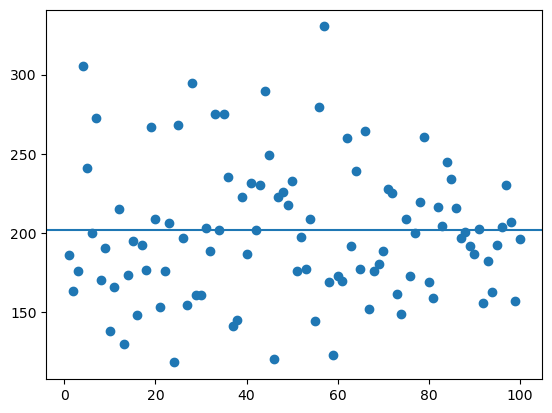

In [26]:
plt.scatter(range(1,101), proportional_sampling_means)
plt.axhline(wnba['PTS'].mean())

## Choosing the right Strata

The results above doesn't seem to vary much compared to the one's of SRS

![Comparison](img/quota_vs_srs.png)

he poor performance is a result of choosing bad strata. We stratified the data by the number of games played, but this isn't a good approach. A player has technically played one game even if she only played for one or two minutes, even though others play 30 or 40 minutes, and it still only qualifies as one game.

It makes more sense to stratify the data by number of minutes played, rather than by number of games played. The minutes played are a much better indicator of how much a player scored in a season than the number of games played.

Our dataset contains the total number of minutes played by each player for the entire season. If we make strata based on minutes played, and then sample proportionally using stratified sampling, we get something visibly better than simple random sampling (especially in terms of variability):

![Better strata](img/quota_minutes.png)

We increased the sample size to 12 so that we can create a better proportional sampling for the strata organized by minutes played. 

Choosing good strata tips

1. __Minimize the variability within each stratum.__

For instance, avoid having in the same stratum a player that has scored 10 points and a player that has scored 500. If the variability is high, it might be a sign that you either need more granular stratification (you need more strata), or you need to change the criterion of stratification (an example of criterion is minutes played).

2. __Maximize the variability between strata.__

Good strata are different from one another. If you have strata that are similar to one another with respect to what you want to measure, you might need a more granular stratification, or you might need to change the stratification criterion. On the previous screen, stratifying the data by games played resulted in strata that were similar to each other regarding the distribution of the total points. We managed to increase the variability between strata by changing the criterion of stratification to minutes played.

3. __The stratification criterion should correlate strongly with the property you're trying to measure.__

For instance, the column describing minutes played (the criterion) should be correlate strongly with the number of total points (property we want to measure).

Using points to sample

In [27]:
wnba['MIN'].value_counts(bins = 3, normalize = True)

(347.333, 682.667]    0.349650
(10.993, 347.333]     0.335664
(682.667, 1018.0]     0.314685
Name: MIN, dtype: float64

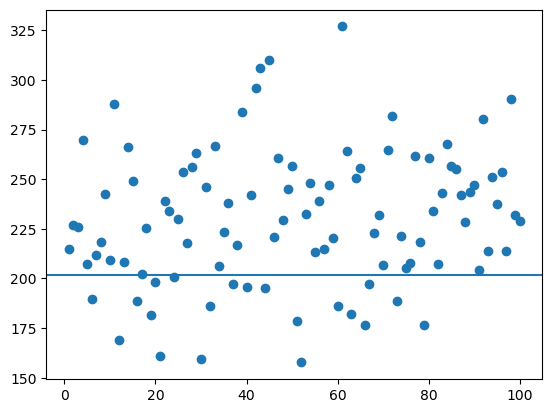

In [28]:
under_683 = wnba[wnba['MIN'] <= 683]
btw_10_347 = wnba[(wnba['MIN'] > 10) & (wnba['Games Played'] <= 387)]
over_683 = wnba[wnba['MIN'] > 683]

proportional_sampling_means = []

for i in range(100):
    sample_under_683 = under_683['PTS'].sample(4, random_state = i)
    sample_btw_10_347 = btw_10_347['PTS'].sample(4, random_state = i)
    sample_over_683 = over_683['PTS'].sample(4, random_state = i)
    
    final_sample = pd.concat([sample_under_683, sample_btw_10_347, sample_over_683])
    proportional_sampling_means.append(final_sample.mean())
    
plt.scatter(range(1,101), proportional_sampling_means)
plt.axhline(wnba['PTS'].mean())

# Cluster Sampling

You want to answer some questions about a population, but the data is scattered in such a way that data collection is either time-consuming or close to impossible. For instance, let's say you want to analyze how people review and rate movies as a function of movie budget. There are many websites that can help with data collection, but how can you go about it so that you can spend a day or two on getting the data you need, rather than a month or two?

One way is to list all the data sources you can find, and then randomly pick only a few of them from which to collect. Then you can individually sample each of the sources you've randomly picked. We call this sampling method cluster sampling, and we call each of the individual data sources a cluster.

![Cluster](img/s1m1_cluster_sampling_v2.svg)

In the case like wnba data, Assuming that all the teams in our dataset have a website from which we can take data, we end up with this list of clusters (each team's website is a cluster) :


In [29]:
wnba['Team'].unique()

array(['DAL', 'LA', 'CON', 'SAN', 'MIN', 'SEA', 'PHO', 'CHI', 'WAS', 'NY',
       'ATL', 'IND'], dtype=object)

Then we need to find a way to randomly pick a few clusters from our listing. There are many ways to do that, but the important thing to keep in mind is that we should avoid picking a cluster twice. Here's one way to sample four clusters randomly:

In [30]:
pd.Series(wnba['Team'].unique()).sample(4, random_state = 0)

6     PHO
11    IND
4     MIN
10    ATL
dtype: object

Once we pick the clusters, we move to collecting the data. We can collect all the data from each cluster, but we can also perform sampling on each. It's actually possible to use different sampling methods for different clusters. For instance, we can use stratified sampling on the first two clusters, and simple random sampling on the other two.

## Task

1. Pick four team clusters randomly using the technique we've learned (use random_state = 0).
2. Collect the data from each cluster without sampling the clusters. Create a new DataFrame object that stores the data collected from all clusters.
3. Use the data collected to estimate the mean for the following player attributes:
        + Height
        + Age
        + BMI
        + Total points
4. Finally, measure the sampling error of your estimates, and assign the errors to the following variables: sampling_error_height, sampling_error_age, sampling_error_BMI, sampling_error_points.

In [34]:
clusters = pd.Series(wnba['Team'].unique()).sample(4, random_state = 0)

sample = pd.DataFrame()

for cluster in clusters:
    data_collected = wnba[wnba['Team'] == cluster]
    sample = sample.concat(data_collected)


sampling_error_height = wnba['Height'].mean() - sample['Height'].mean()
sampling_error_age = wnba['Age'].mean() - sample['Age'].mean()
sampling_error_BMI = wnba['BMI'].mean() - sample['BMI'].mean()
sampling_error_points = wnba['PTS'].mean() - sample['PTS'].mean()


"\nclusters = pd.Series(wnba['Team'].unique()).sample(4, random_state = 0)\n\nsample = pd.DataFrame()\n\nfor cluster in clusters:\n    data_collected = wnba[wnba['Team'] == cluster]\n    sample = sample.concat(data_collected)\n\n\nsampling_error_height = wnba['Height'].mean() - sample['Height'].mean()\nsampling_error_age = wnba['Age'].mean() - sample['Age'].mean()\nsampling_error_BMI = wnba['BMI'].mean() - sample['BMI'].mean()\nsampling_error_points = wnba['PTS'].mean() - sample['PTS'].mean()\n"

[More on Sampling](https://en.wikipedia.org/wiki/Sampling_(statistics)#Sampling_methods)